# Sequence Length

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from core.rnn import create_model, load_data, train

LABELS = ["walking", "stairs_down", "stairs_up", "sitting", "standing", "laying"]

In [3]:
def try_model(sequence_length, labels, epochs=50):
    model = create_model(sequence_length, labels)

    x_train, y_train = load_data("../data/uci_train_6.csv", sequence_length, labels)
    x_test, y_test = load_data("../data/uci_test_6.csv", sequence_length, labels)
    
    history = train(
        model,
        x_train,
        y_train,
        x_test,
        y_test,
        epochs=epochs,
        batch_size=128,
        verbose=False
    )
    
    return max(history.history["val_acc"])

## Length 32 (640ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________


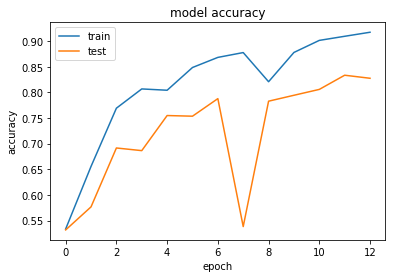

In [4]:
accuracy_32 = try_model(32, LABELS, epochs=13)

## Length 64 (1280ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________


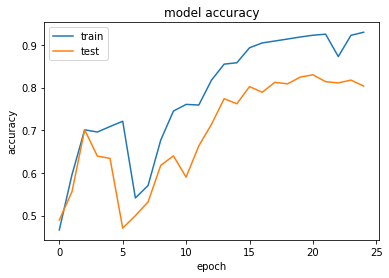

In [5]:
accuracy_64 = try_model(64, LABELS, epochs=25)

## Length 80 (1600ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________


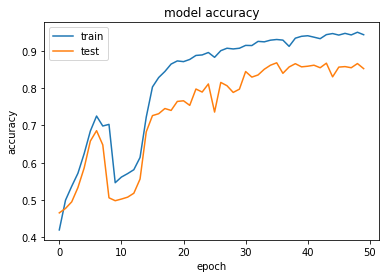

In [6]:
accuracy_80 = try_model(80, LABELS)

## Length 96 (1920ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________


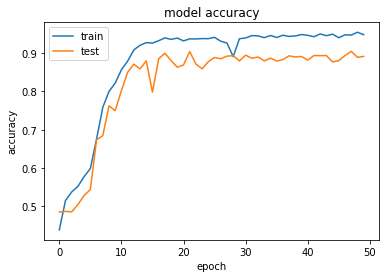

In [7]:
accuracy_96 = try_model(96, LABELS)

## Length 128 (2560ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
Total params: 55,014
Trainable params: 55,014
Non-trainable params: 0
_________________________________________________________________


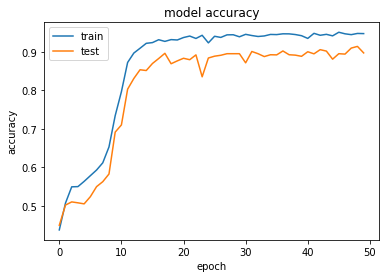

In [8]:
accuracy_128 = try_model(128, LABELS)

## Conclusions

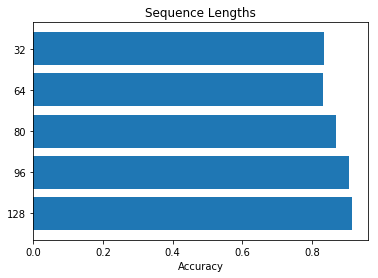

In [11]:
fig, ax = plt.subplots()

lengths = ('32', '64', '80', '96', '128')
y_pos = np.arange(len(lengths))
performance = np.array([accuracy_32, accuracy_64, accuracy_80, accuracy_96, accuracy_128])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(lengths)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Sequence Lengths')

plt.show()